In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
from pca import pca as pca_p
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, ConfusionMatrixDisplay
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import SilhouetteVisualizer

***

## TASK 1

In [3]:
# loading and presenting the dataset.
column_names=['id','diagnosis','mean_radius', 'mean_texture',
'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness',
'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
'radius_error', 'texture_error', 'perimeter_error', 'area_error',
'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error',
'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture',
'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness',
'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = pd.read_csv('data/wdbc.data', names=column_names)
print(df.shape)
df.head()

(569, 32)


id diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst_radius  worst_texture  worst_perimeter  worst_area  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

<div class="alert alert-block alert-success">
<b>The Data:</b>

The Breast Cancer Wiscosin Dataset has 569 rows and 32 columns which include id, diagnosis and 30 real valued input features.Ten real-valued features are computed for each cell nucleus measured in pixels:

a) radius -> mean of distances from center to points on the perimeter<br>
b) texture -> standard deviation of gray-scale insensities in the component pixels<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>
The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features.

This dataset is suitable for the project pitched in phase 1 as the features of this dataset are all continuous data. The dataset also includes a diagnosis column which can be used for two ideas:<br>
a) Compare if our clustering result for the dataset has only two clusters or if there are more.<br>
b) Filter the dataset based on the diagnosis and check if there are further clusters within the ones classified as Malignant or Benign Tumours.
</div>

***

# TASK 2 & Task 3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  radius_error             569 non-null    float64
 13  texture_error            569 non-null    float64
 14  perimeter_error          5

<div class="alert alert-block alert-success">
<b>The result of the code above shows that our dataset doesn't have a non-null value. Hence, we do not need to perform any pre-processing steps.</b>
</div>

***

# TASK 4 - Exploratory Data Analysis: Statistical properties.

`In order to use pairplot on the dataset, we are including only the first 10 columns i.e, we are considering the mean values and excluding the worst and error values since we are dealing with a large number of columns.`

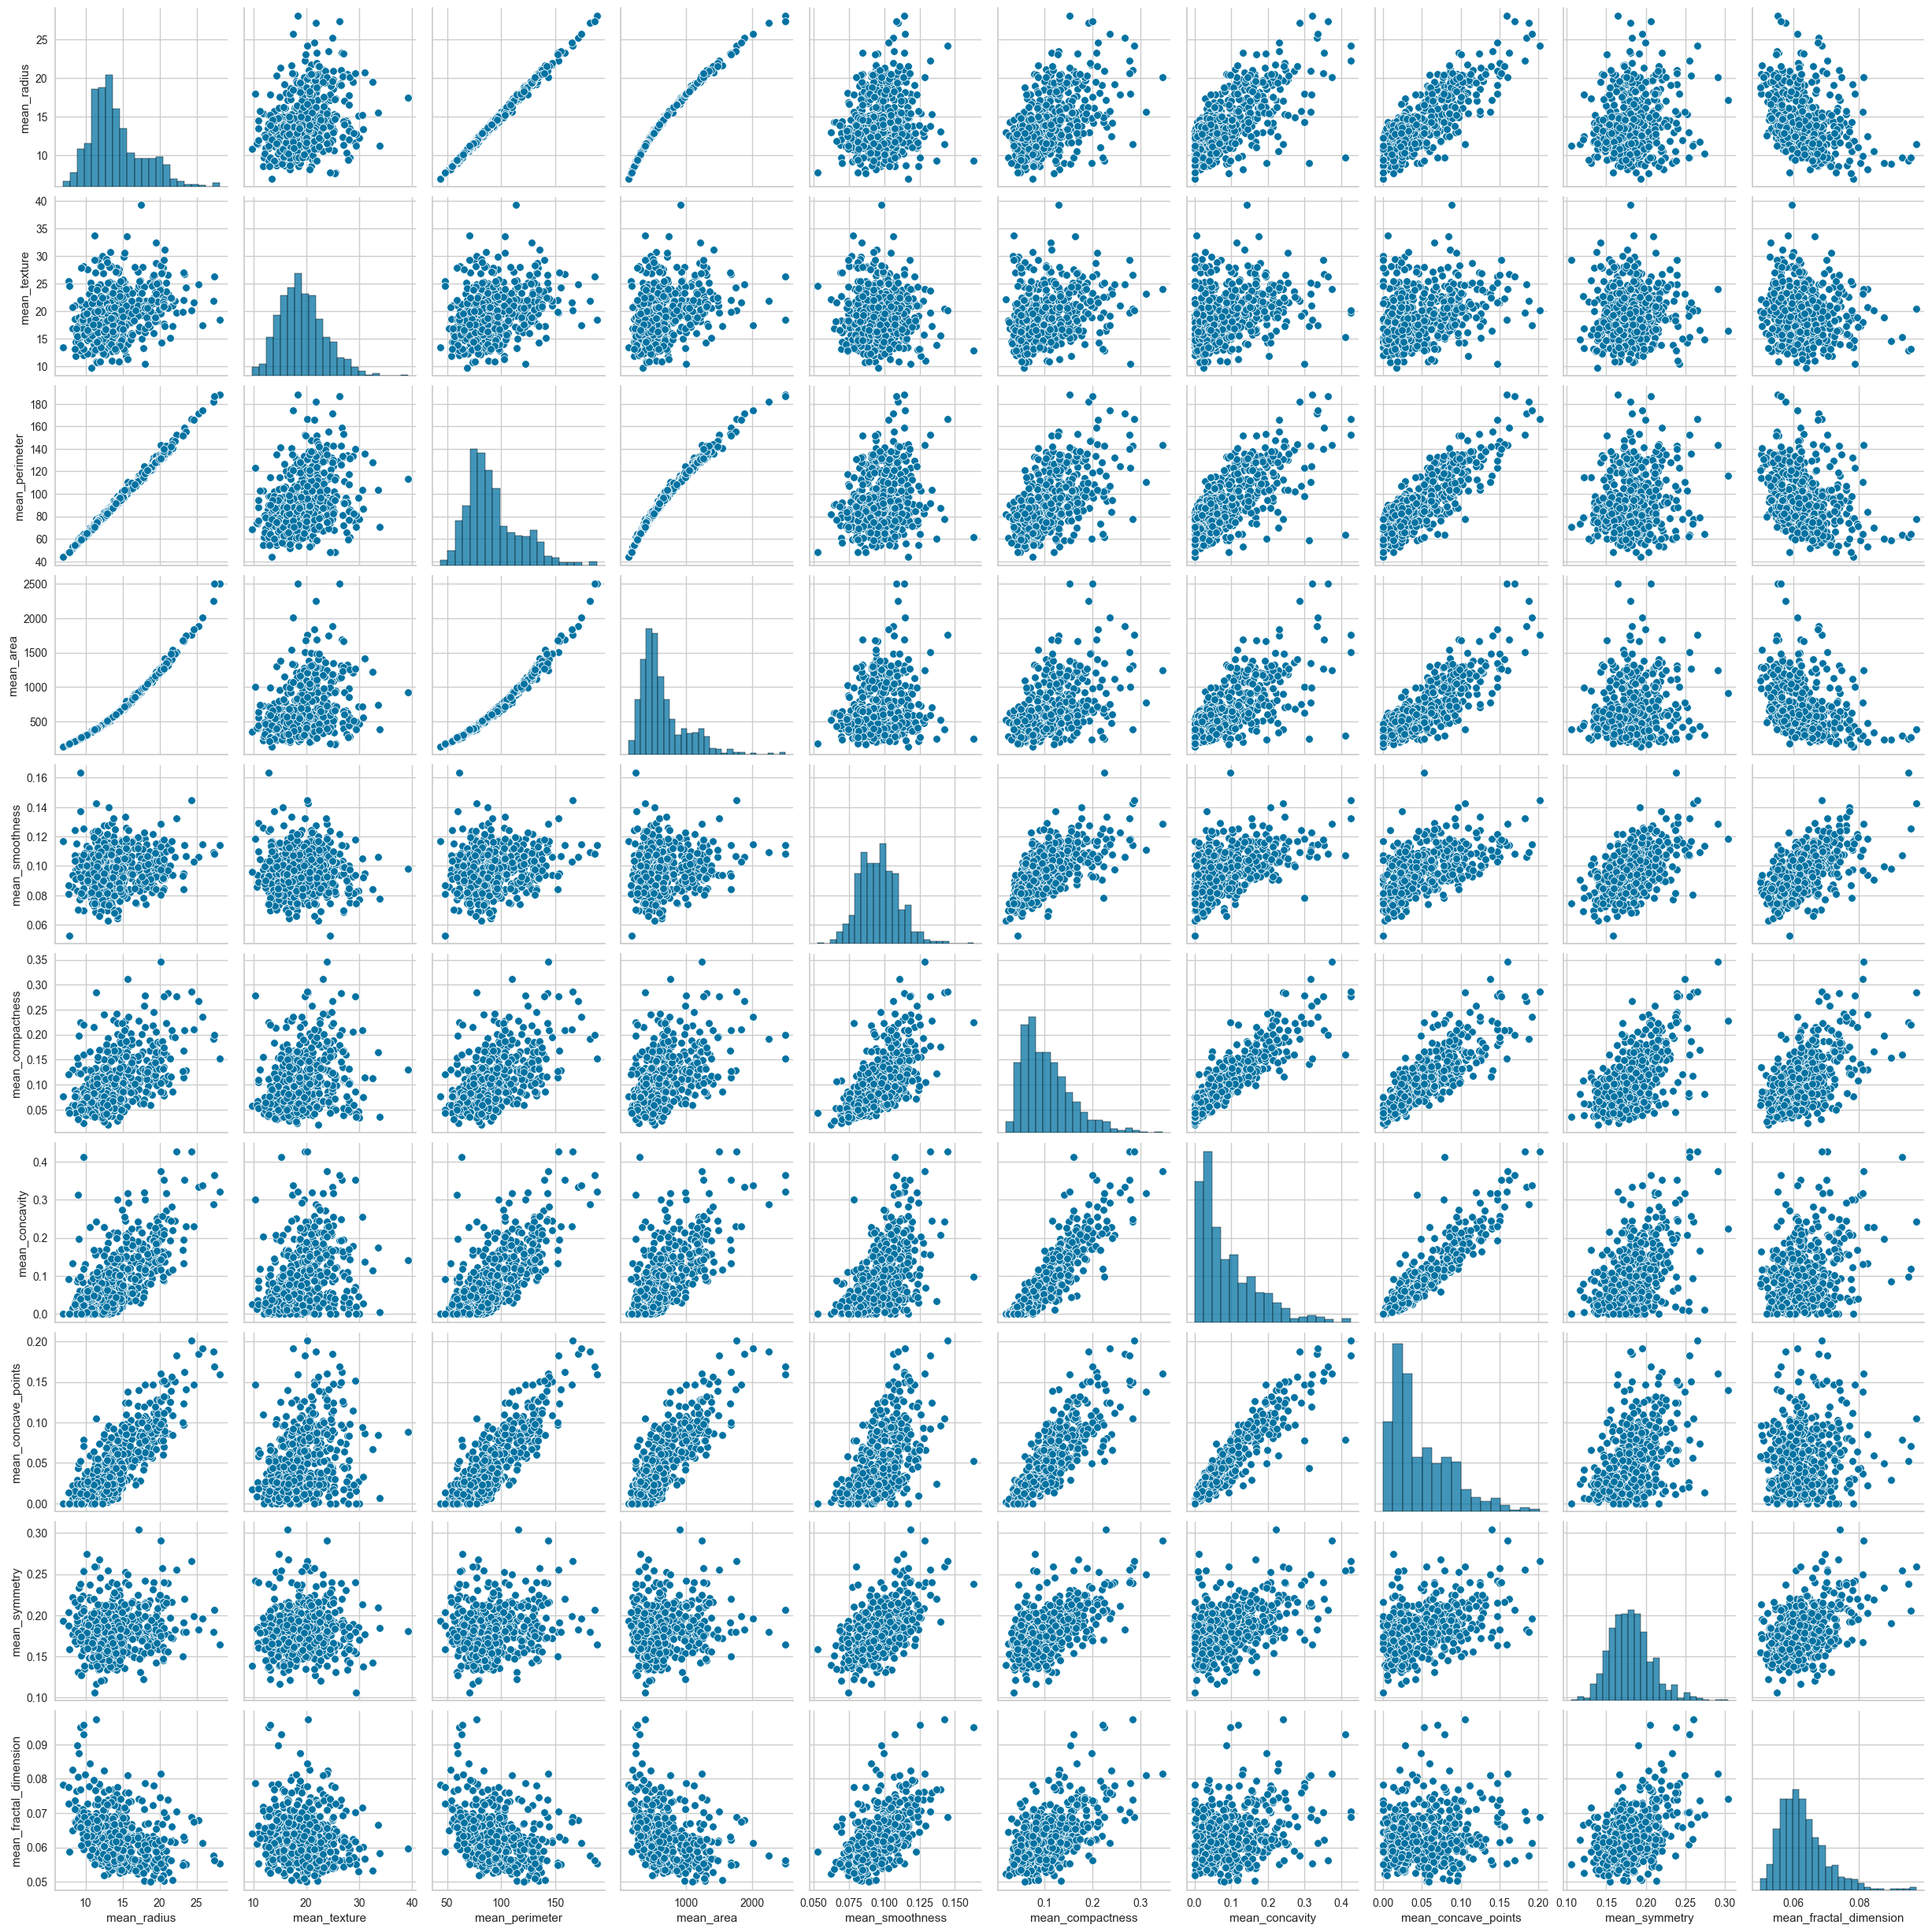

In [4]:
'''The below code takes some time to run so if it doesn't
load automatically, the image is also available in the
resources folder as output_pairplot.png'''
sns.pairplot(df.iloc[:,2:12])

<div class="alert alert-block alert-success">
<b>We also use the pandas describe property to view the statistical properties of the dataset.</b>
</div>

In [5]:
main_data_df = df.drop(columns='diagnosis').set_index('id')
main_data_df.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean_symmetry  mean_fractal_dimension  ...  worst_radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst_texture  worst_perimeter   worst_area  worst_smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst_compactness  worst_concavity  worst_concave_points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst_symmetry  worst_fractal_dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

***

# TASK 5 - Applying clustering algorithms

`We will start by applying the KMeans algorithm. Since, it was told to solve only problem for the assignment, we are going to use clustering on the dataset and compare it with the diagnosis column as mentioned in suitability of the dataset point a) above.`

In [6]:
# normalising the data before we apply KMeans.
main_data_scaled_df = StandardScaler().fit_transform(main_data_df).round(2)

# checking the silhouette score for certain values, to determine K.
for n_clusters in range(2,10):
    model = KMeans(n_clusters=n_clusters)
    score = silhouette_score(main_data_scaled_df, model.fit_predict(main_data_scaled_df))
    print(f'For cluster {n_clusters}, the silhouette score is {score}')

For cluster 2, the silhouette score is 0.34472139869967067
For cluster 3, the silhouette score is 0.31511940299872243
For cluster 4, the silhouette score is 0.16274370304504948
For cluster 5, the silhouette score is 0.16743094430818586
For cluster 6, the silhouette score is 0.1597819861726397
For cluster 7, the silhouette score is 0.15345840844327055
For cluster 8, the silhouette score is 0.1264208684981025
For cluster 9, the silhouette score is 0.12676619034173786


<div class="alert alert-block alert-success">
<b>From the output above, we can see maximum silhouette score for clusters 2 and 3. And from the visualization below between clusters 2 & 3, we see that cluster size 2 is less noisy compared to 3 clusters.</b>
</div>

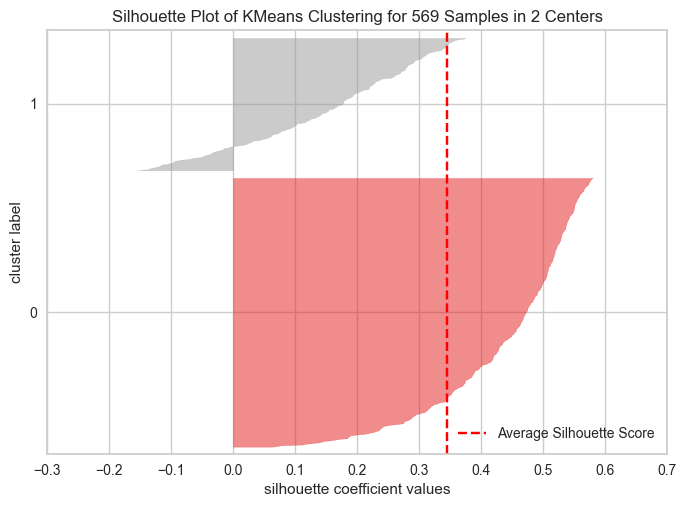

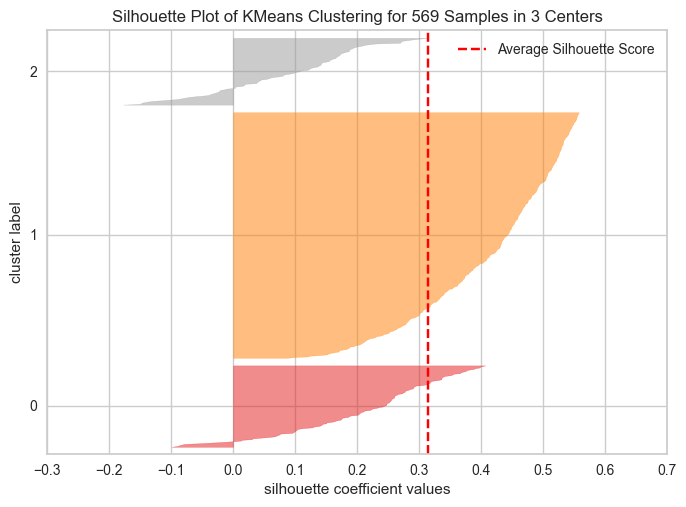

In [7]:
for n_clusters in [2,3]:
    model = KMeans(n_clusters=n_clusters)
    vis = SilhouetteVisualizer(model)
    vis.fit(main_data_scaled_df)
    vis.show()

In [8]:
# applying KMeans
kmeans_pp = KMeans(
    n_clusters=2,
    random_state=42,
    init='random')

cluster_assignments_km=kmeans_pp.fit_predict(main_data_scaled_df)

def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

k_means_report(kmeans_pp)

k-means 
 * has seen 30 features,
 * used 8 iterations, and 
 * resulted in an inertia of 11596.539988920962.


In [9]:
colors = ["red", "darkblue", "green", "yellow"]
def print_clustering(X, clusters):
    plt.figure(figsize=(8, 8))
    X_noise=X[clusters==-1, :]
    plt.scatter(X_noise[:,0], X_noise[:,1], c='black', s=10)
    for cluster in np.unique(clusters):
        if (cluster!=-1):
            X_cluster=X[clusters==cluster, :]
            plt.scatter(X_cluster[:,0], X_cluster[:,1], c=colors[cluster], s=10)

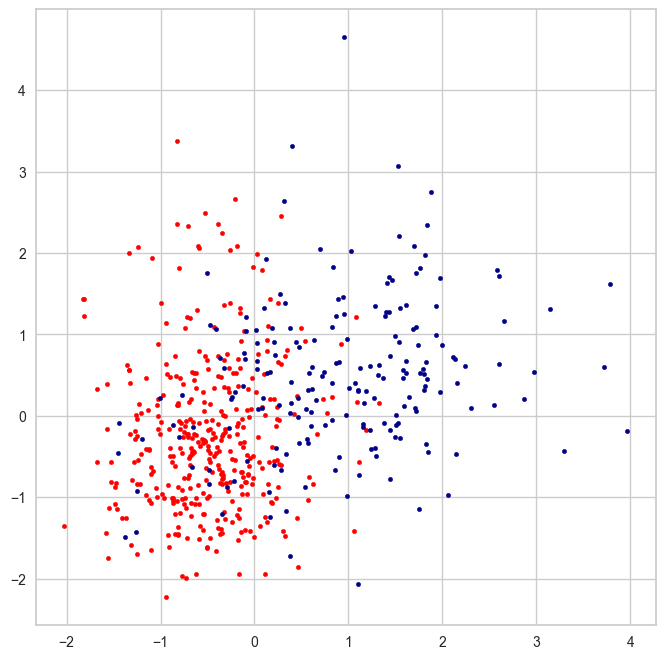

In [10]:
print_clustering(main_data_scaled_df, cluster_assignments_km)

<div class="alert alert-block alert-success">
<b> Takeaways:
 <ul>
  <li>The clustering had a silhoutte coefficient of nearby 0.3 which is way below the acceptable range.</li>
  <li>The resulted image also hence shows that there is no proper clustering as certain points that belong to one cluster can also belong to the other cluster</li>
</ul>
Hence we will try other algorithms and then see how they differ compared to Kmeans.</b>
</div>

`Now we will be applying DBSCAN algorithm on the dataset. But before that we have to choose two hyperparameters epsilon and min_points.`

<div class="alert alert-block">
<b>The min_points can be selected based on the dimensionality of the dataset. The min_points should always be atleast the dimensionality of the dataset. Hence, since our no. of features is 30. We will keep our min_points as 35. And we will calculate epsilon using K-Nearest Neighbor graph where k is our min_points</b>
</div>

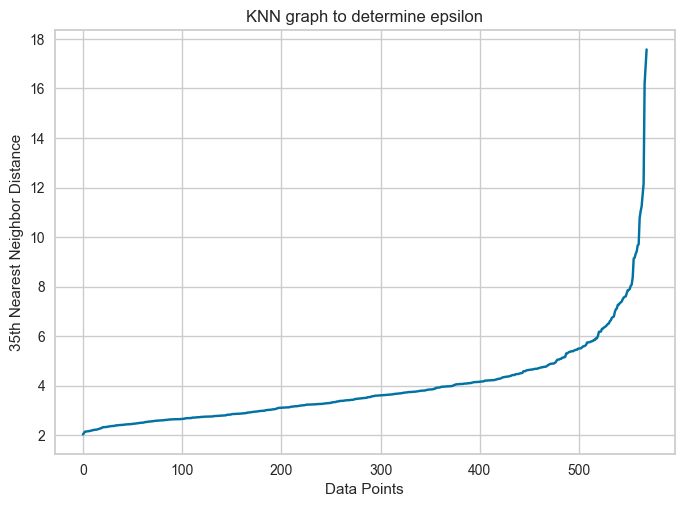

In [11]:
# I was not sure about which library to use to acheive this purpose and hence I had to refer: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
nbrs = NearestNeighbors(n_neighbors=35, algorithm='ball_tree').fit(main_data_scaled_df)
distances,indices = nbrs.kneighbors(main_data_scaled_df)

# selecting only the distance to the Kth Neighbor
distances = distances[:, -1]
# Sorting the distances before plotting
distances = np.sort(distances)
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'35th Nearest Neighbor Distance')
plt.title('KNN graph to determine epsilon')
plt.show()

<div class="alert alert-block alert-success">
<b>From the above diagram we can see that the elbow point occurs around 6. Hence, our epsilon is 6.</b>
</div>

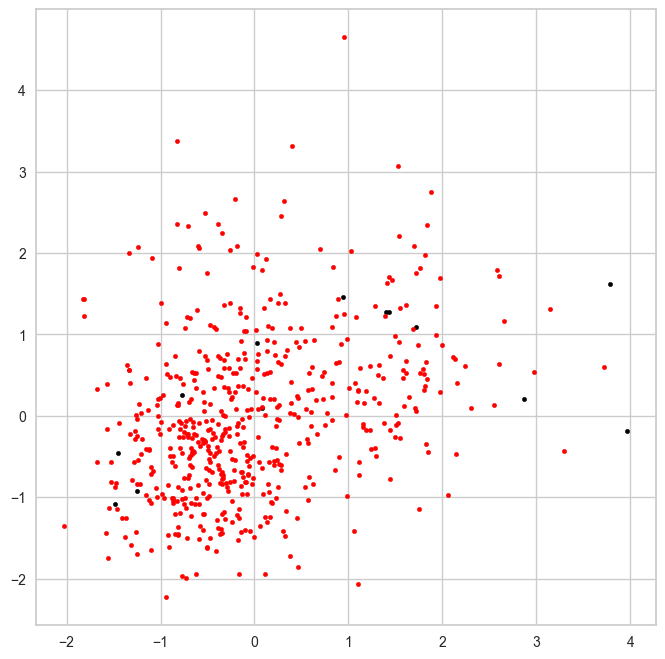

In [12]:
# applying DBSCAN with epsilon 6 and min points 50.
dbscan=DBSCAN(eps=6, min_samples=35, metric='euclidean')
dbscan_clusters=dbscan.fit_predict(main_data_scaled_df)
print_clustering(main_data_scaled_df, dbscan_clusters)


<div class="alert alert-block alert-success">
<b><ul><li>The DBSCAN clustering resulted in 1 cluster maked in red and a few noise points in Black.<ul></b>
</div>

`We will now play around with the hyperparameters to see if we can get a different result.`

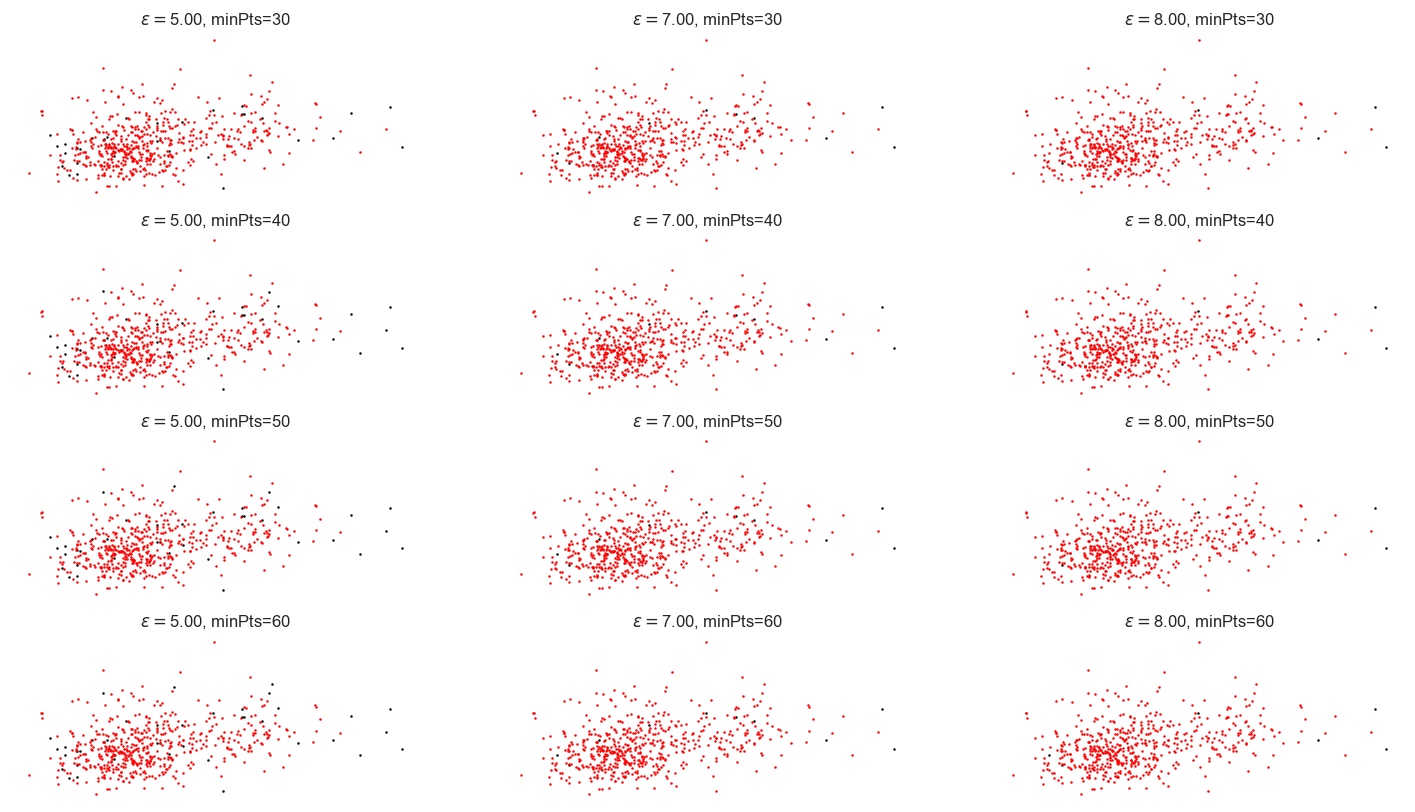

In [13]:
epsilons = (5, 7, 8)
min_ptss = (30, 40, 50, 60)
color_array = ['red', 'blue', 'black']
point_size = 2

epss, ptss = np.meshgrid(epsilons, min_ptss)
_, axes = plt.subplots(nrows=len(min_ptss), ncols=len(epsilons), figsize=(18, 10))
for ax, eps, min_pts in zip(axes.reshape(-1), epss.reshape(-1) , ptss.reshape(-1)):
    ax.set_axis_off()
    dbscan=DBSCAN(eps=eps, min_samples=min_pts, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)
    dbscan.fit_predict(main_data_scaled_df)
    y_pred=dbscan.labels_
    if (len(np.unique(y_pred))>len(colors)): 
        for i in np.unique(y_pred):
            ax.scatter(main_data_scaled_df[y_pred==i, 0], main_data_scaled_df[y_pred==i, 1], s=point_size)
        ax.scatter(main_data_scaled_df[y_pred==-1, 0], main_data_scaled_df[y_pred==-1, 1], c='black', s=point_size)

        
    else:
        for i in np.unique(y_pred):
            ax.scatter(main_data_scaled_df[y_pred==i, 0], main_data_scaled_df[y_pred==i, 1], c=color_array[i], s=point_size)                
    ax.set_title(r'$\epsilon=$%.2f, minPts=%i' % (eps, min_pts))

<div class="alert alert-block">
<b>
<ul>
<li>The above diagram shows that even after changing the values of the hyperparameters, the DBSCAN gives a single cluster. And the diagrams differ only by the noise points.
<ul></b>
</div>

`We will now apply Hierarchical Agglomerative Clustering algorithm to our dataset to see the output.`

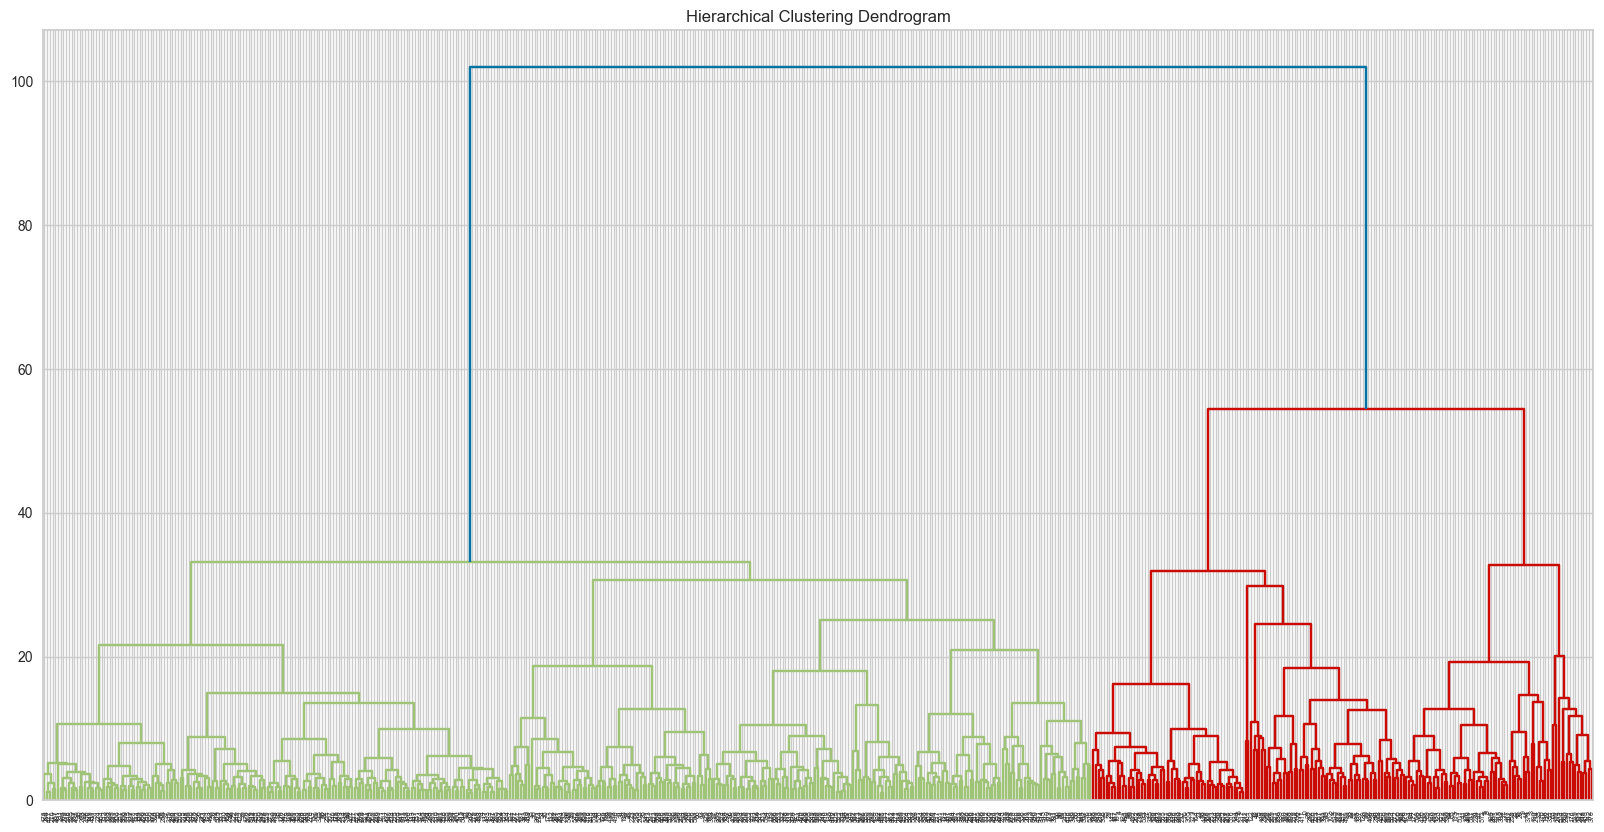

In [14]:
# finding number of clusters using dendrogram. Referred: https://stackoverflow.com/a/64558207/12924114
plt.figure(figsize=(20, 10))
dendrogram(linkage(main_data_scaled_df, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


<div class="alert alert-block alert-success">
<b><ul><li>We are able to identify the cluster size as 2.</li></ul></b>
</div>

In [19]:
def create_linkage(agg):
    n_samples = len(agg.labels_)
    counts = np.zeros(agg.children_.shape[0])
    for i, merge in enumerate(agg.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([agg.children_, agg.distances_,counts]).astype(float)
    return linkage_matrix

def cluster_and_draw(df, affinity, linkage, color_threshold=None):
    agg = cluster.AgglomerativeClustering(
        n_clusters=2, 
        metric=affinity, 
        linkage=linkage, 
        compute_distances=True
    )
    labels = agg.fit_predict(df)
    hierarchy.set_link_color_palette(colors)
    plt.figure(figsize=(18,5))
    dendrogram(
        create_linkage(agg),
        color_threshold=color_threshold, 
        orientation='left', 
        labels=df.index, 
        leaf_rotation=0)
    plt.show()
    return labels

`analysing the cluster for various linkage options and types.`

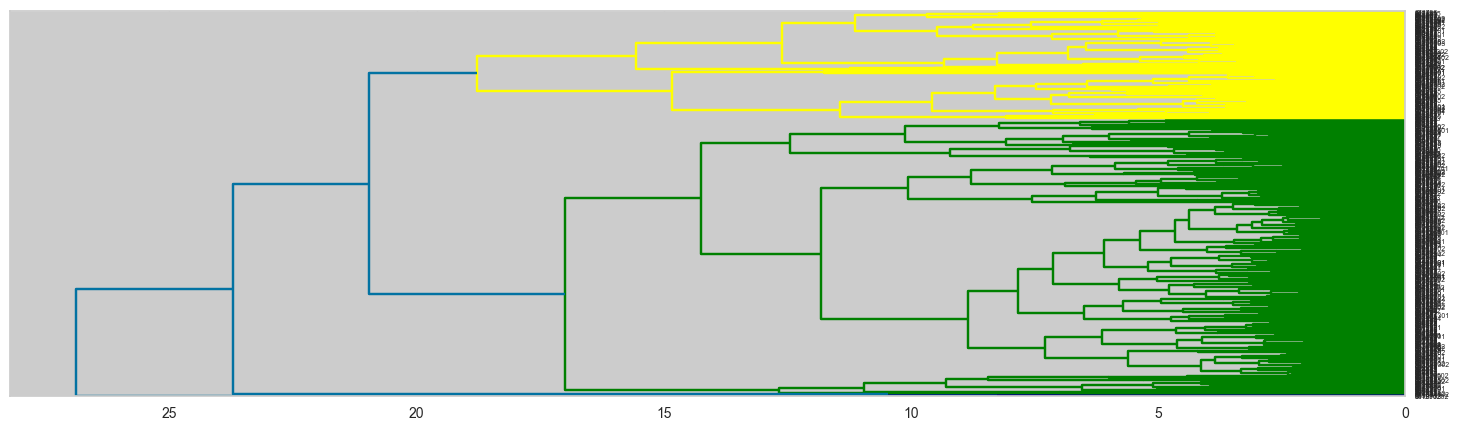

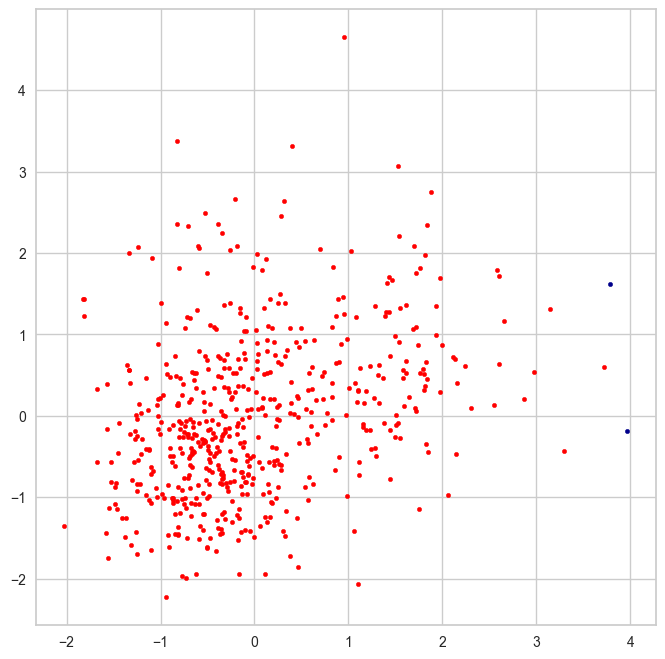

In [20]:
# using default color threshold.
data_df = pd.DataFrame(main_data_scaled_df, index=main_data_df.index, columns=main_data_df.columns)
labels = cluster_and_draw(data_df, 'euclidean', 'complete')
data_df['cluster'] = labels
print_clustering(main_data_scaled_df, labels)

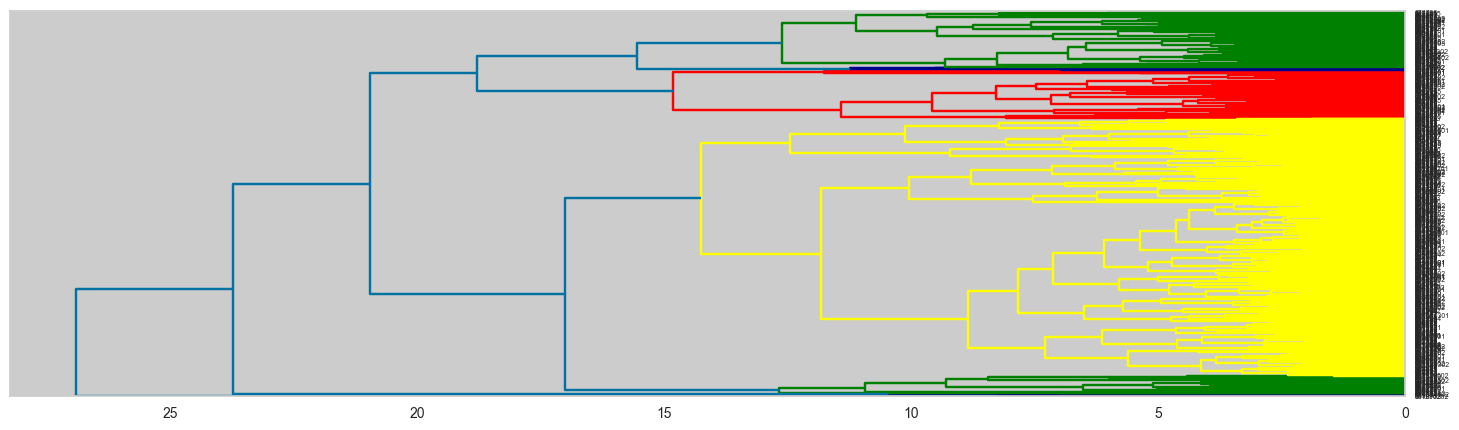

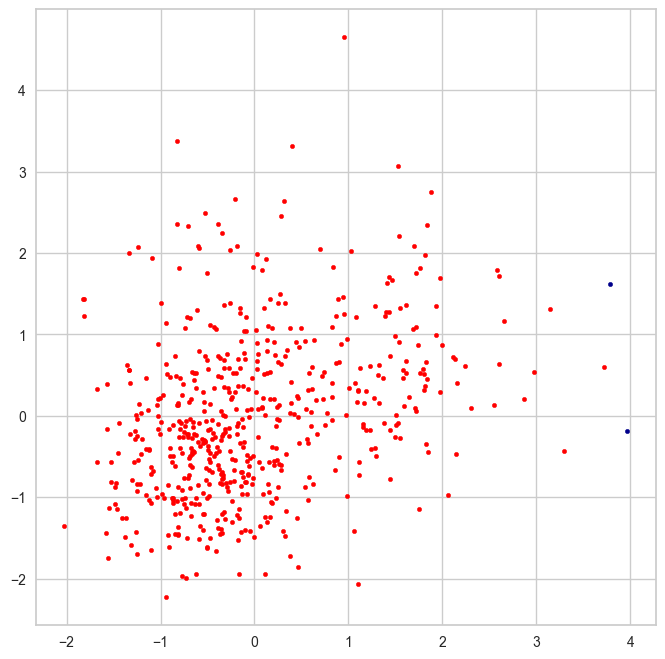

In [21]:
# using color threshold as 15.
labels_a = cluster_and_draw(data_df, 'euclidean', 'complete', 15)
print_clustering(main_data_scaled_df, labels_a)

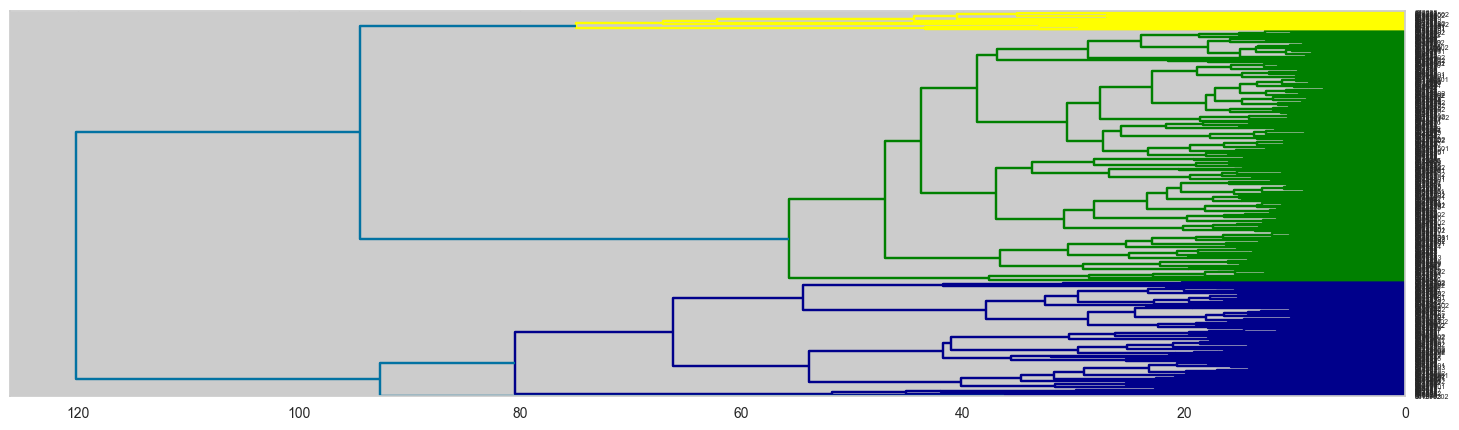

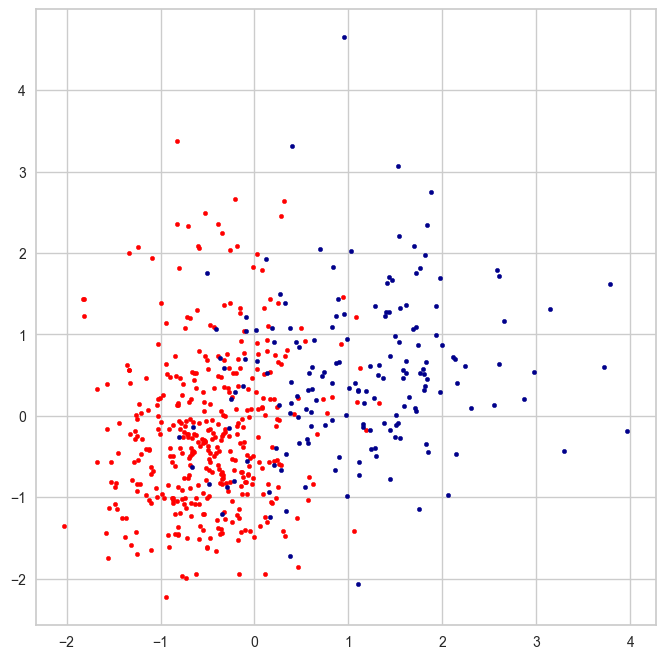

In [22]:
# using distance function as manhattan and color threshold default
labels_b = cluster_and_draw(data_df, 'manhattan', 'complete')
print_clustering(main_data_scaled_df, labels_b)

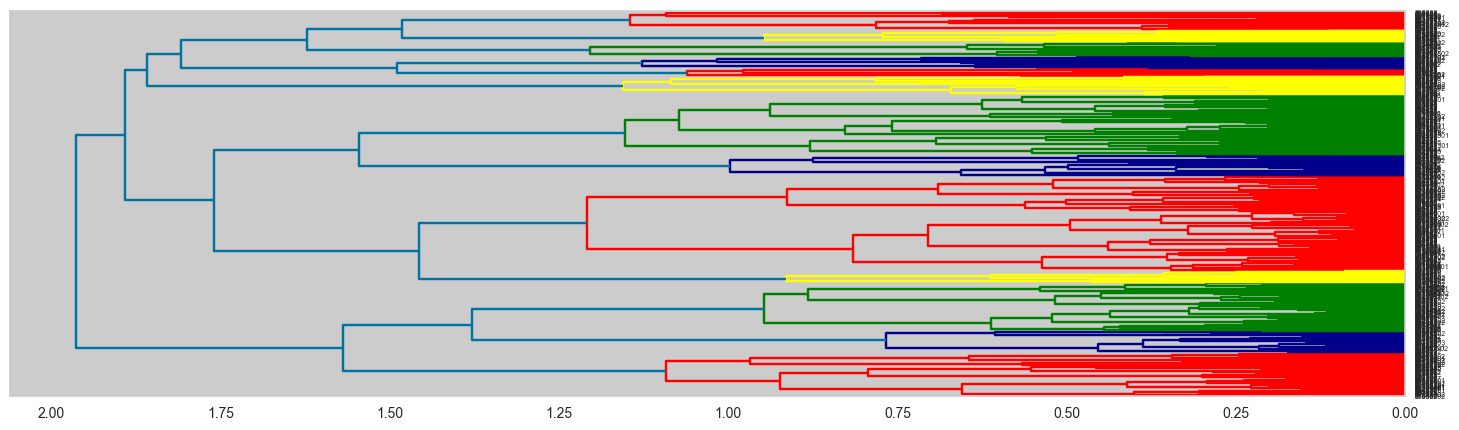

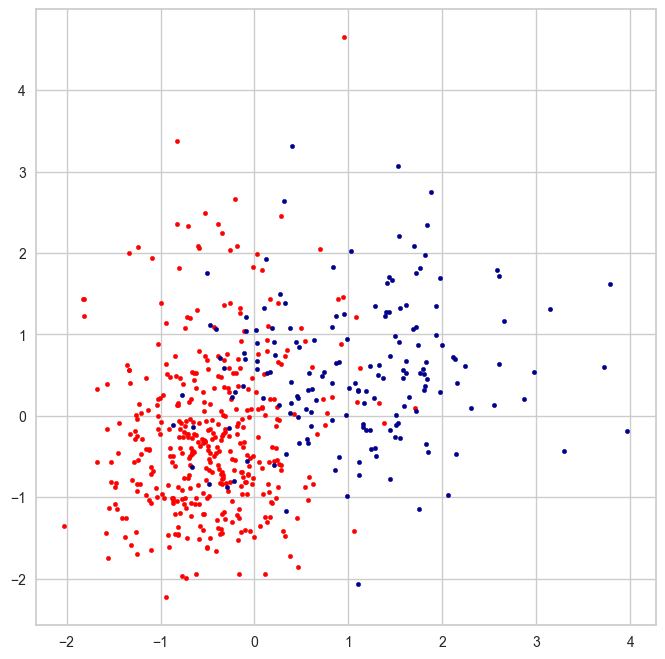

In [23]:
# using distance function as cosine and color threshold default
labels_c = cluster_and_draw(data_df, 'cosine', 'complete')
print_clustering(main_data_scaled_df, labels_c)

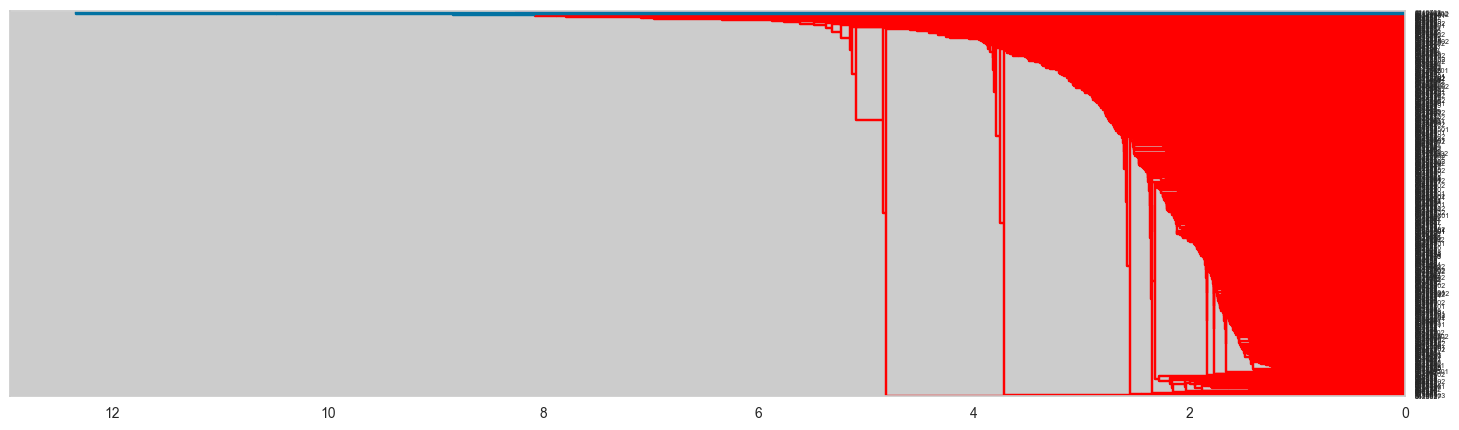

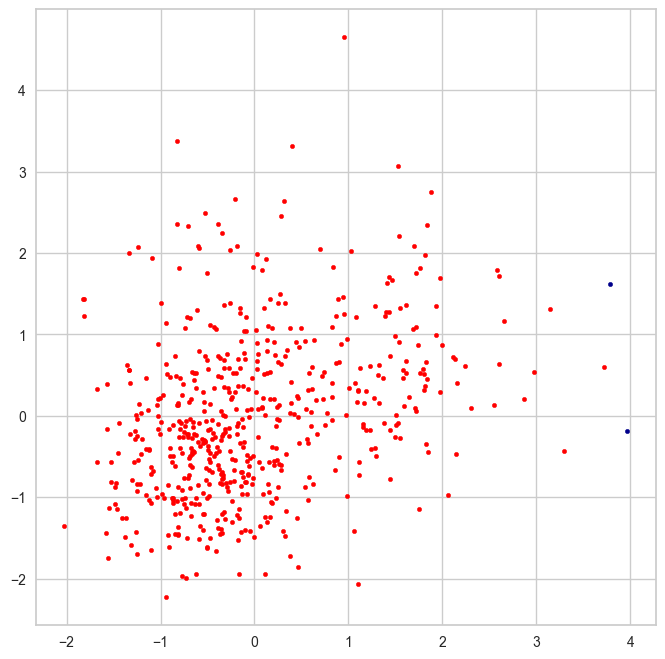

In [24]:
# using linkage type as single
labels_d = cluster_and_draw(data_df, 'euclidean', 'single')
print_clustering(main_data_scaled_df, labels_d)

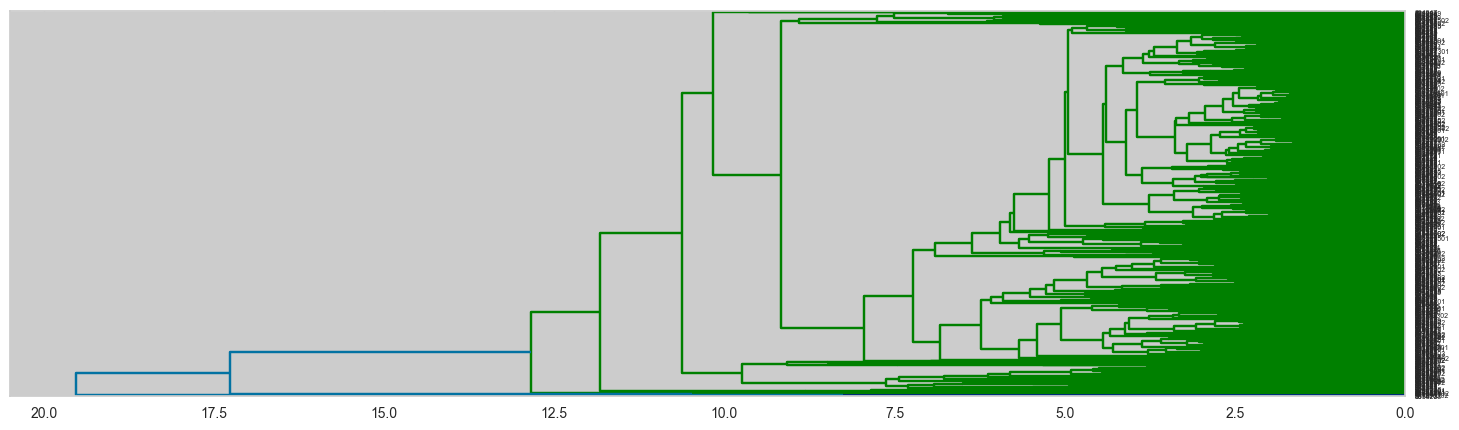

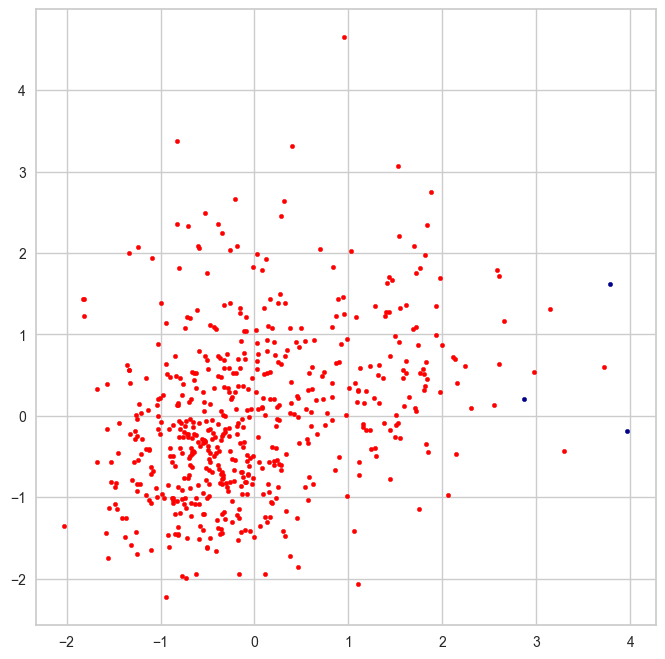

In [25]:
# using linkage type as average
labels_e = cluster_and_draw(data_df, 'euclidean', 'average')
print_clustering(main_data_scaled_df, labels_e)

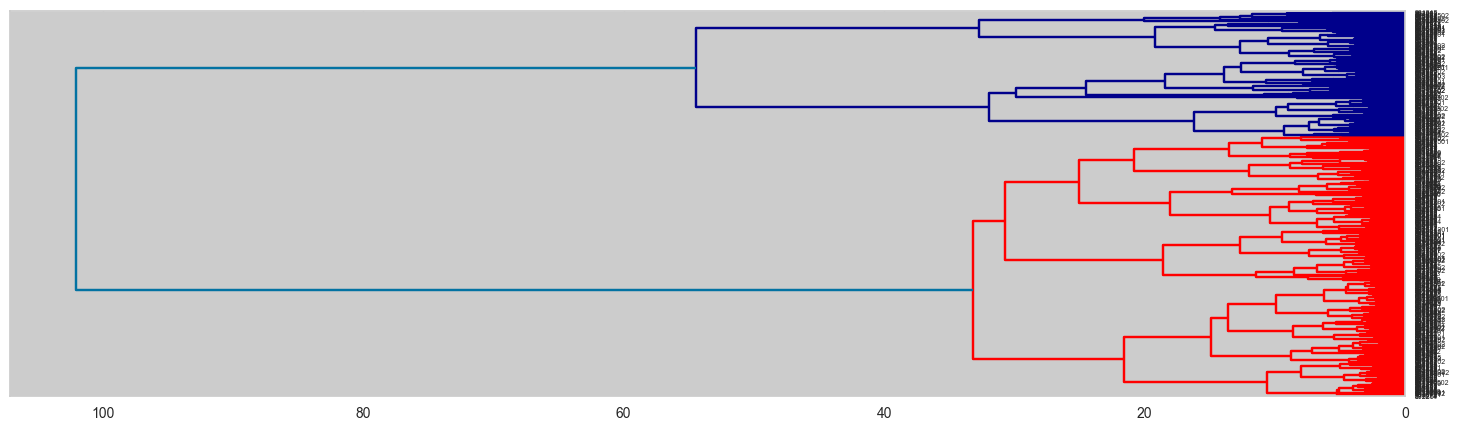

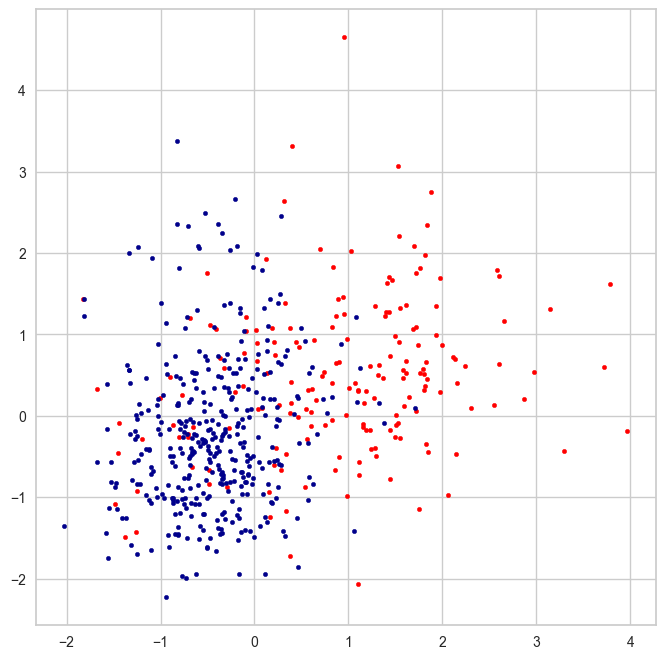

In [26]:
# using linkage type as ward
labels_f = cluster_and_draw(data_df, 'euclidean', 'ward')
print_clustering(main_data_scaled_df, labels_f)

<div class="alert alert-block">
<b> Takeaways:
 <ul>
  <li>The cluster size was determined as 2 which is also what we had determined during Kmeans using Silhouette coefficient.</li>
  <li>The HAC clustering output is different from the one we saw in DBSCAN where it mostly put all the data in a single cluster. However, DBSCAN is not sensitive to outliers.</li>
  <li> Even in HAC, the most explained clustering results came out in (manhattan & complete) and (euclidean & ward) as the distance function & linkage type respectively.</li>
</ul>
</b>
</div>

***

# TASK-6 Dimensionality Reduction

In [27]:
# performing covariance analysis of the features.
data_df.cov().round(2)

mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius                     1.00          0.32            1.00       0.99   
mean_texture                    0.32          1.00            0.33       0.32   
mean_perimeter                  1.00          0.33            1.00       0.99   
mean_area                       0.99          0.32            0.99       1.00   
mean_smoothness                 0.17         -0.02            0.21       0.18   
mean_compactness                0.51          0.24            0.56       0.50   
mean_concavity                  0.68          0.30            0.72       0.69   
mean_concave_points             0.82          0.29            0.85       0.82   
mean_symmetry                   0.15          0.07            0.18       0.15   
mean_fractal_dimension         -0.31         -0.08           -0.26      -0.28   
radius_error                    0.68          0.28            0.69       0.73   
texture_error                  -0.10          0.39           -0.09      -0.07   
perimeter_error                 0.68          0.28            0.69       0.73   
area_error                      0.74          0.26            0.75       0.80   
smoothness_error               -0.22          0.01           -0.20      -0.17   
compactness_error               0.21          0.19            0.25       0.21   
concavity_error                 0.19          0.14            0.23       0.21   
concave_points_error            0.38          0.16            0.41       0.37   
symmetry_error                 -0.10          0.01           -0.08      -0.07   
fractal_dimension_error        -0.04          0.05           -0.01      -0.02   
worst_radius                    0.97          0.35            0.97       0.96   
worst_texture                   0.30          0.91            0.30       0.29   
worst_perimeter                 0.97          0.36            0.97       0.96   
worst_area                      0.94          0.34            0.94       0.96   
worst_smoothness                0.12          0.08            0.15       0.12   
worst_compactness               0.41          0.28            0.46       0.39   
worst_concavity                 0.53          0.30            0.57       0.51   
worst_concave_points            0.75          0.30            0.77       0.72   
worst_symmetry                  0.16          0.11            0.19       0.14   
worst_fractal_dimension         0.01          0.12            0.05       0.00   
cluster                         0.01          0.00            0.01       0.02   

                         mean_smoothness  mean_compactness  mean_concavity  \
mean_radius                         0.17              0.51            0.68   
mean_texture                       -0.02              0.24            0.30   
mean_perimeter                      0.21              0.56            0.72   
mean_area                           0.18              0.50            0.69   
mean_smoothness                     1.00              0.66            0.52   
mean_compactness                    0.66              1.00            0.88   
mean_concavity                      0.52              0.88            1.00   
mean_concave_points                 0.55              0.83            0.92   
mean_symmetry                       0.56              0.60            0.50   
mean_fractal_dimension              0.59              0.57            0.34   
radius_error                        0.30              0.50            0.63   
texture_error                       0.07              0.05            0.08   
perimeter_error                     0.30              0.55            0.66   
area_error                          0.25              0.46            0.62   
smoothness_error                    0.33              0.14            0.10   
compactness_error                   0.32              0.74            0.67   
concavity_error                     0.25              0.57            0.69   
concave_points_error        

`As expected, features such as mean_radius, mean_perimeter and mean_area are highly correlated to each other. Whereas the features such as mean_smoothness and mean_symmetry has no or less linear relation to mean_radius. `

In [28]:
# applying PCA to reduce dimensions.
pca_x=PCA()
pca_transformed=pca_x.fit_transform(data_df)
scaled_data_pcaf=pd.DataFrame(pca_transformed, index=data_df.index)
scaled_data_pcaf.round(2).cov().round(2)

0    1     2     3     4     5     6     7     8     9   ...    21  \
0   13.31  0.0 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00  ... -0.00   
1    0.00  5.7  0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00  ...  0.00   
2   -0.00  0.0  2.82  0.00 -0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
3    0.00  0.0  0.00  1.98  0.00 -0.00 -0.00  0.00  0.00  0.00  ... -0.00   
4    0.00  0.0 -0.00  0.00  1.65  0.00 -0.00 -0.00  0.00 -0.00  ... -0.00   
5    0.00 -0.0  0.00 -0.00  0.00  1.21  0.00  0.00  0.00 -0.00  ... -0.00   
6    0.00 -0.0  0.00 -0.00 -0.00  0.00  0.68 -0.00  0.00  0.00  ...  0.00   
7   -0.00 -0.0  0.00  0.00 -0.00  0.00 -0.00  0.48  0.00 -0.00  ... -0.00   
8    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.42 -0.00  ...  0.00   
9    0.00 -0.0  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.35  ... -0.00   
10  -0.00  0.0  0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  ... -0.00   
11   0.00  0.0 -0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00  ... -0.00   
12   0.00  0.0 -0.00  0.00 -0.00 -0.00  0.00  0.00  0.00  0.00  ... -0.00   
13   0.00  0.0  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  ...  0.00   
14   0.00 -0.0  0.00 -0.00 -0.00 -0.00 -0.00  0.00 -0.00  0.00  ... -0.00   
15  -0.00 -0.0 -0.00 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  ... -0.00   
16   0.00 -0.0 -0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  ... -0.00   
17   0.00  0.0 -0.00 -0.00 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  ...  0.00   
18  -0.00  0.0  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00  ...  0.00   
19   0.00  0.0 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  ... -0.00   
20  -0.00 -0.0  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  ... -0.00   
21  -0.00  0.0  0.00 -0.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00  ...  0.03   
22   0.00  0.0  0.00 -0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  ...  0.00   
23  -0.00  0.0 -0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  ... -0.00   
24  -0.00  0.0  0.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00  ... -0.00   
25  -0.00 -0.0  0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  ... -0.00   
26   0.00 -0.0  0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00  0.00  ... -0.00   
27   0.00  0.0  0.00 -0.00  0.00  0.00 -0.00  0.00  0.00 -0.00  ...  0.00   
28   0.00 -0.0  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  ... -0.00   
29   0.00  0.0 -0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  ... -0.00   
30  -0.00  0.0 -0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.00  ... -0.00   

      22    23    24    25    26   27   28   29   30  
0   0.00 -0.00 -0.00 -0.00  0.00  0.0  0.0  0.0 -0.0  
1   0.00  0.00  0.00 -0.00 -0.00  0.0 -0.0  0.0  0.0  
2   0.00 -0.00  0.00  0.00  0.00  0.0  0.0 -0.0 -0.0  
3  -0.00  0.00 -0.00 -0.00 -0.00 -0.0  0.0  0.0 -0.0  
4   0.00 -0.00  0.00 -0.00  0.00  0.0  0.0 -0.0  0.0  
5   0.00 -0.00 -0.00 -0.00 -0.00  0.0 -0.0 -0.0 -0.0  
6   0.00  0.00 -0.00  0.00  0.00 -0.0  0.0 -0.0  0.0  
7   0.00  0.00 -0.00  0.00 -0.00  0.0  0.0  0.0  0.0  
8  -0.00 -0.00  0.00 -0.00  0.00  0.0  0.0 -0.0 -0.0  
9  -0.00 -0.00 -0.00 -0.00  0.00 -0.0 -0.0 -0.0  0.0  
10 -0.00  0.00  0.00  0.00 -0.00 -0.0 -0.0  0.0  0.0  
11  0.00  0.00  0.00  0.00  0.00 -0.0 -0.0  0.0 -0.0  
12 -0.00 -0.00 -0.00  0.00  0.00  0.0 -0.0 -0.0 -0.0  
13  0.00 -0.00 -0.00 -0.00  0.00  0.0  0.0 -0.0 -0.0  
14 -0.00  0.00 -0.00  0.00  0.00  0.0 -0.0 -0.0  0.0  
15  0.00 -0.00 -0.00  0.00 -0.00  0.0  0.0  0.0 -0.0  
16  0.00 -0.00  0.00  0.00  0.00  0.0 -0.0  0.0  0.0  
17  0.00 -0.00  0.00 -0.00  0.00 -0.0 -0.0 -0.0  0.0  
18 -0.00 -0.00  0.00  0.00 -0.00  0.0  0.0 -0.0  0.0  
19 -0.00 -0.00  0.00  0.00 -0.00 -0.0  0.0 -0.0  0.0  
20  0.00  0.00  0.00 -0.00  0.00 -0.0 -0.0 -0.0 -0.0  
21  0.00 -0.00 -0.00 -0.00 -0.00  0.0 -0.0 -0.0 -0.0  
22  0.02 -0.00 -0.00  0.00 -0.00  0.0 -0.0  0.0  0.0  
23 -0.00  0.02 -0.00 -0.00  0.00  0.0  0.0  0.0 -0.0  
24 -0.00 -0.00  0.02 -0.00  0.00  0.0 -0.0  0.0  0.0  
25  0.00 -0.00 -0.00  0.01  0.00  0.0 -0.0  0.0  0.0  
26 -0.00  0.00  0.00  0.00  0.01 -0.0 -0.0 -0.0  0.0  
27

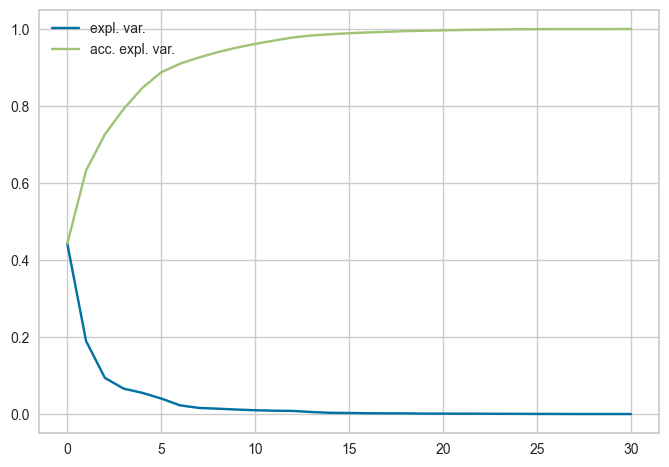

In [29]:
# creating the explained variance graph
expl_var=pca_x.explained_variance_ratio_
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.legend()

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [31] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


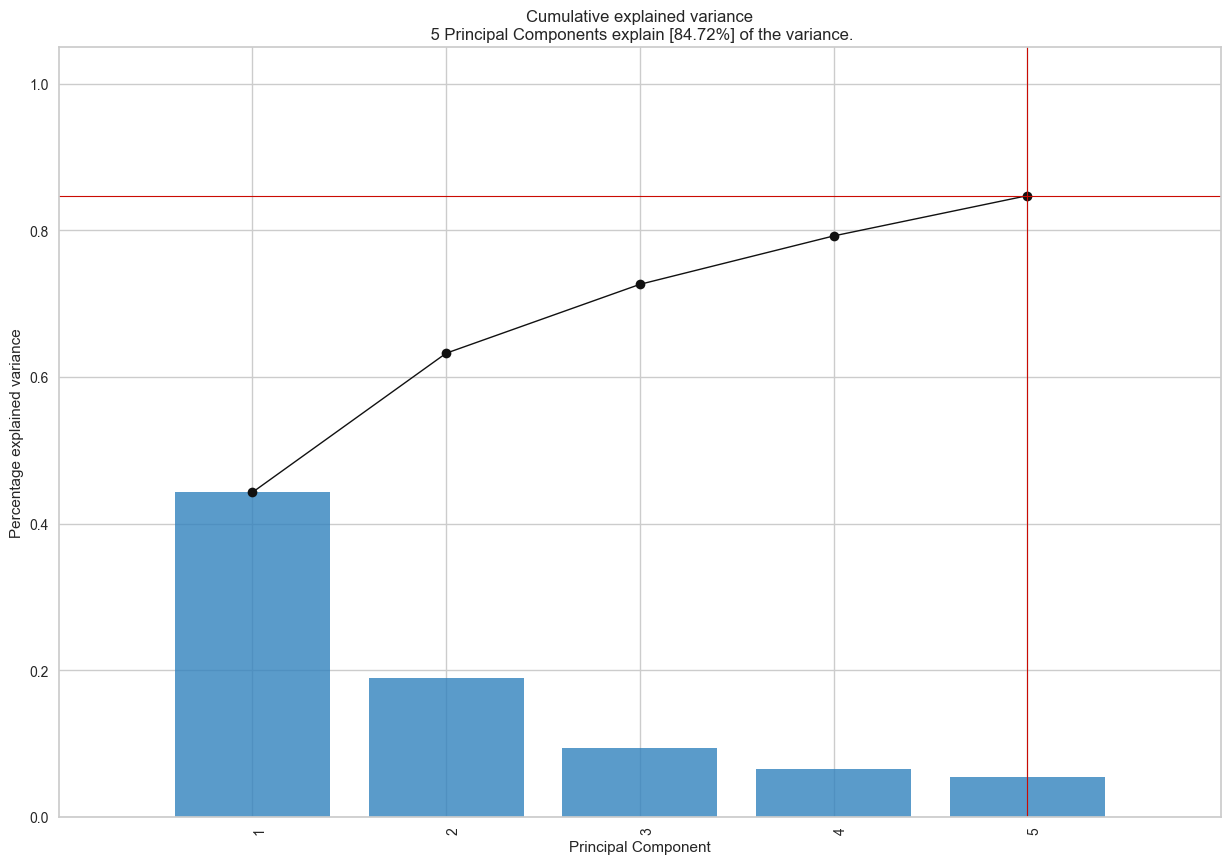

In [30]:
model = pca_p(n_components=5)

# Fit transform
results = model.fit_transform(data_df)

# explained variance
fig, ax = model.plot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


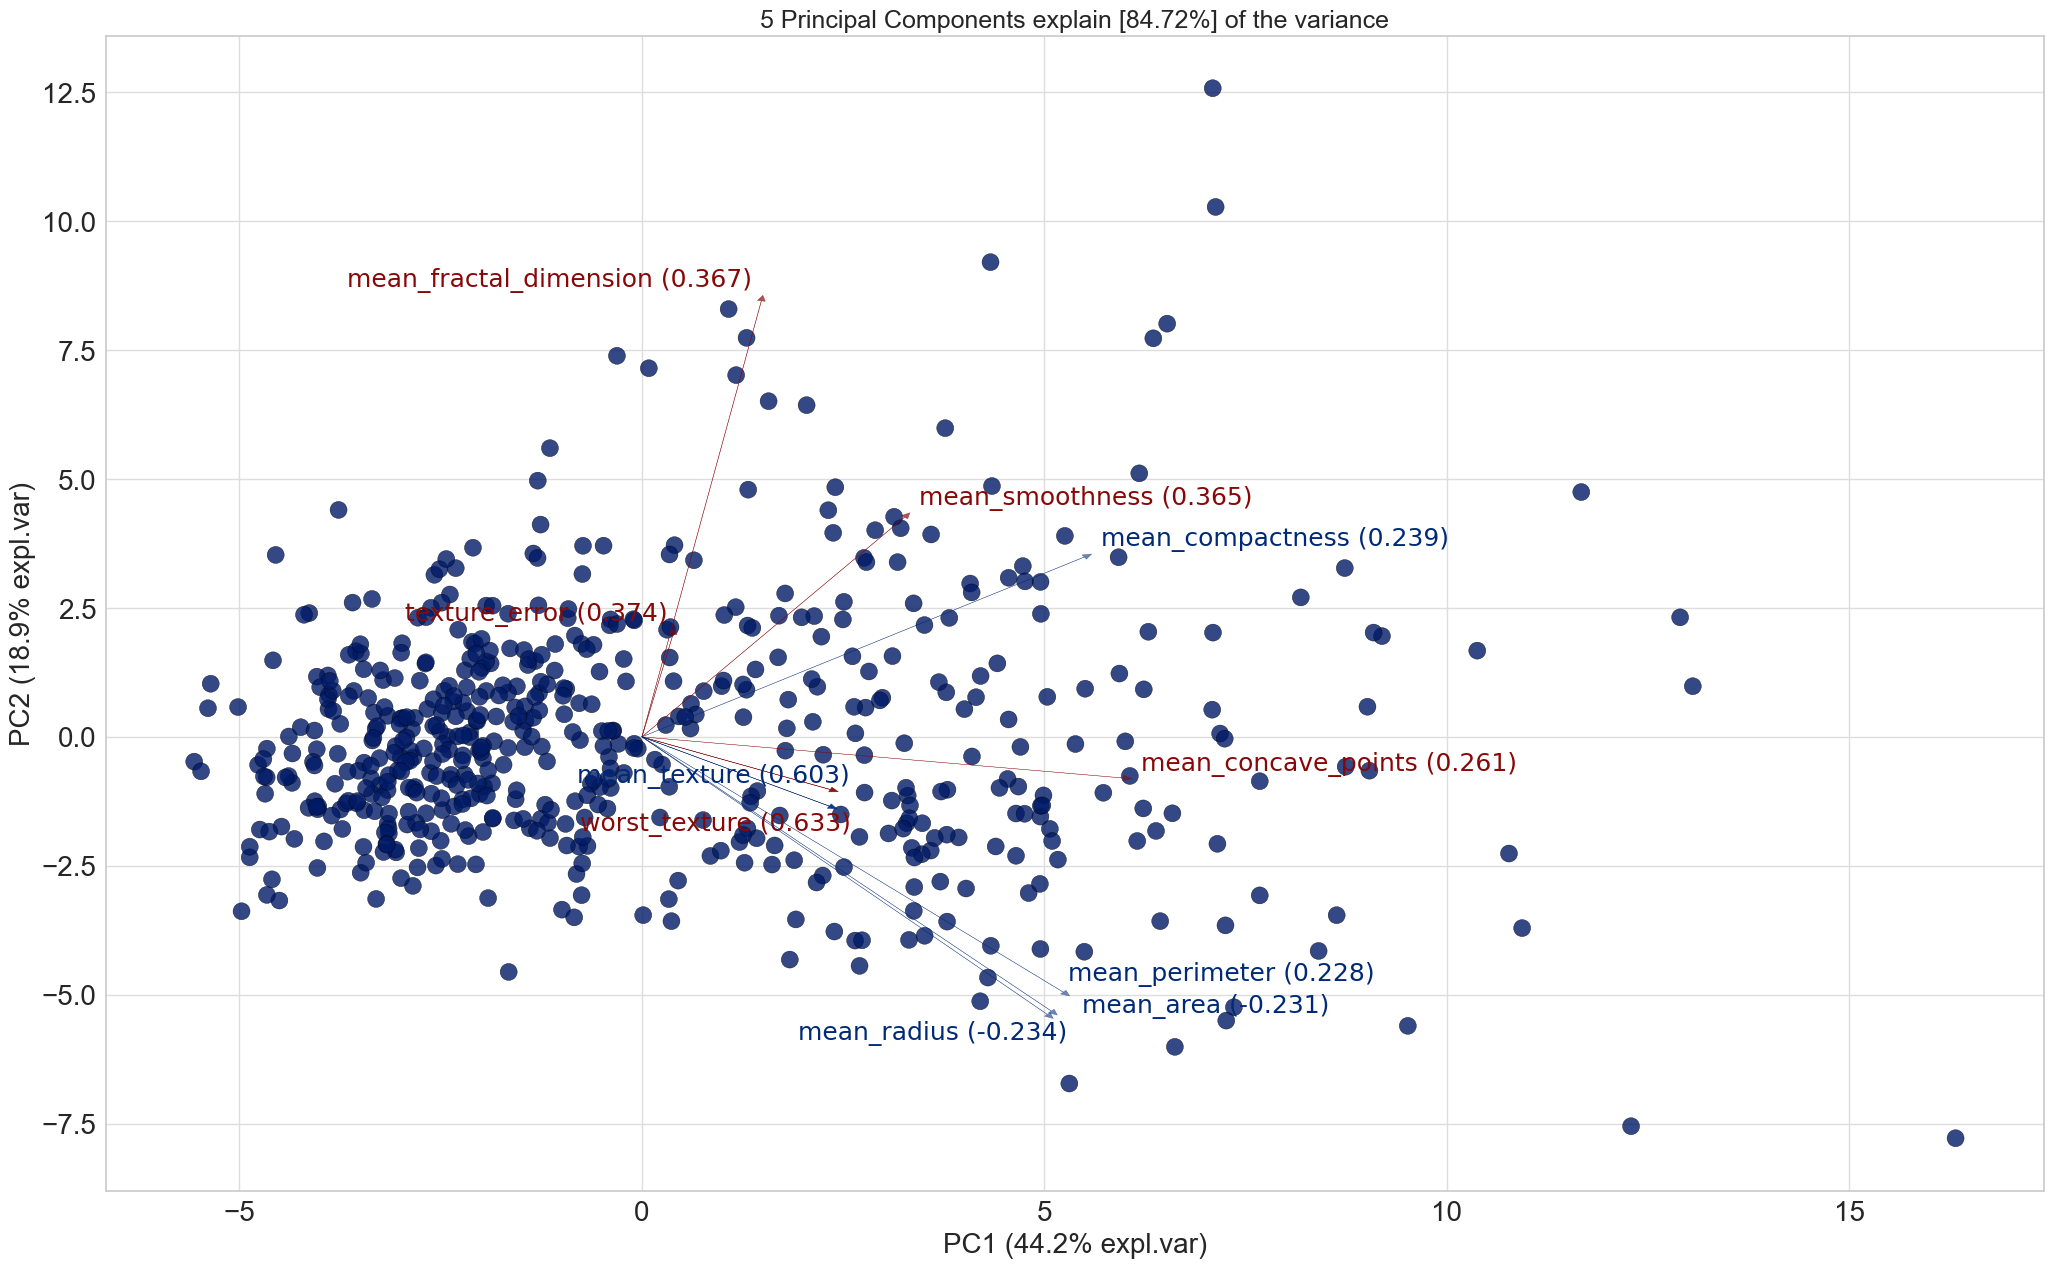

In [31]:
fig, ax = model.biplot(n_feat=10, legend=False, PC=[0,1]) 

<div class="alert alert-block">
<b>
 <ul>
  <li>The first 5 principal components explain around 85% of the variance.</li>
  <li>The biplot of PC1 vs PC2 shows that worst_texture is the features with the most weight in PC1. The mean_texture in the same direction means that the two features have high linear independence to each other.</li>
  <li>For PC2, mean_fractal_dimension has the highest weightage and the length of the vector shows its strength w.r.t the components.</li>
</ul>
</b>
</div>

In [32]:
pca_output_data = model.results['PC'].to_numpy()
pca_output_data

array([[ 9.19343141,  1.95342317, -1.12319831, -3.63717033,  1.19150495],
       [ 2.39022491, -3.77440447, -0.53315699, -1.11679586, -0.630127  ],
       [ 5.73215025, -1.08406004, -0.55336395, -0.90869181,  0.18153946],
       ...,
       [ 1.25622502, -1.90372606,  0.56026629,  2.0906097 , -1.80698198],
       [10.37727641,  1.67148983, -1.87321491,  2.35677246,  0.0420152 ],
       [-5.47648226, -0.66858659,  1.4888873 ,  2.29393714,  0.18459174]])

`Now we will apply all the algorithms again on the pca reduced dataset.`

k-means 
 * has seen 5 features,
 * used 11 iterations, and 
 * resulted in an inertia of 8992.84045178225.


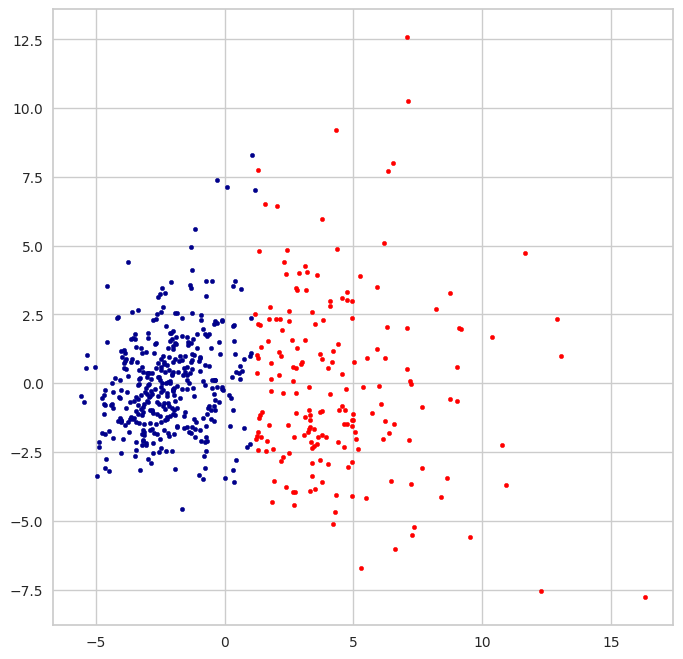

In [33]:
# applying Kmeans.
cluster_assignments_km_pca = kmeans_pp.fit_predict(pca_output_data)
k_means_report(kmeans_pp)
print_clustering(pca_output_data, cluster_assignments_km_pca)

<div class="alert alert-block alert-success">
<b><ul><li>After the dimenionality reduction, we see a better clustering than the previous Kmeans output.</li>
<li>We also see a reduction in the inertia from around 11600 to 9000.</li>
<li>However, if we compute the silhouette coefficient, it has not increased by much as seen below which means this clustering approach may not be the best one</li></ul></b>
</div>

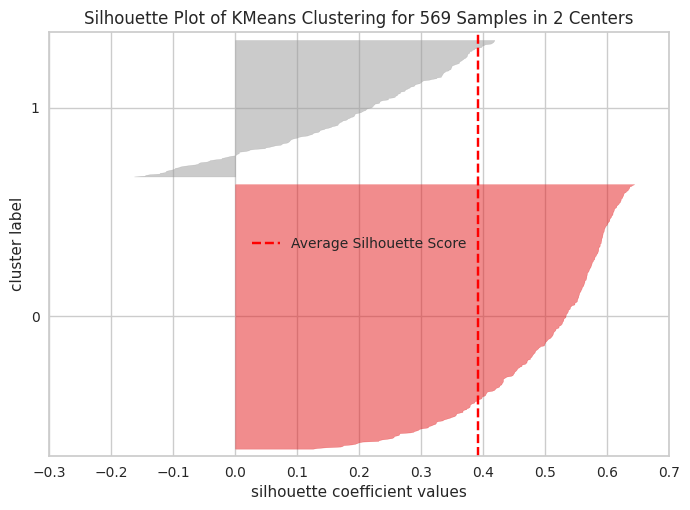

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding silhouette coefficient.
model = KMeans(n_clusters=2)
vis = SilhouetteVisualizer(model)
vis.fit(pca_output_data)
vis.show()

***

`applying DBSCAN algorithm`

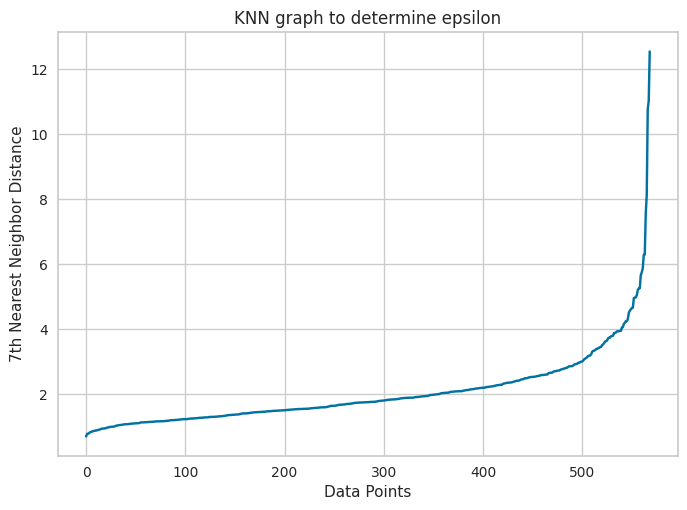

In [35]:
# fetching the updated eps value using K-Nearest Graph on the reduced dataset.
nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(pca_output_data)
distances,indices = nbrs.kneighbors(pca_output_data)

# selecting only the distance to the Kth Neighbor
distances = distances[:, -1]
# Sorting the distances before plotting
distances = np.sort(distances)
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'7th Nearest Neighbor Distance')
plt.title('KNN graph to determine epsilon')
plt.show()


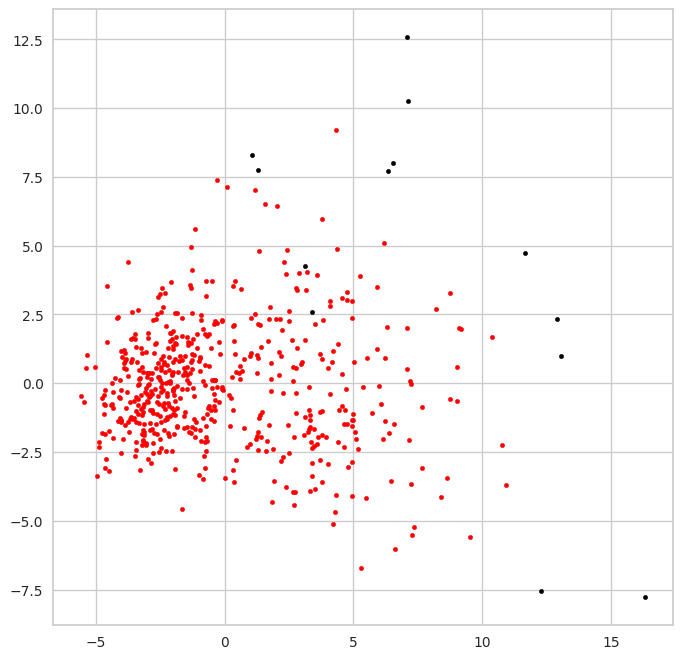

In [36]:
# based on the above diagram, we will be updating our value for eps as 4 and min_samples as 7
dbscan_pca=DBSCAN(eps=4, min_samples=7, metric='euclidean')
dbscan_clusters_pca=dbscan_pca.fit_predict(pca_output_data)
print_clustering(pca_output_data, dbscan_clusters_pca)

<div class="alert alert-block alert-success">
<b><ul><li>After the dimenionality reduction, we don't see any difference in DBSCAN with the updated eps and min_points values.The datapoints are again slotted into one single cluster.</li></ul></b>
</div>

***

`applying Hierarchical Agglomerative Clustering.`

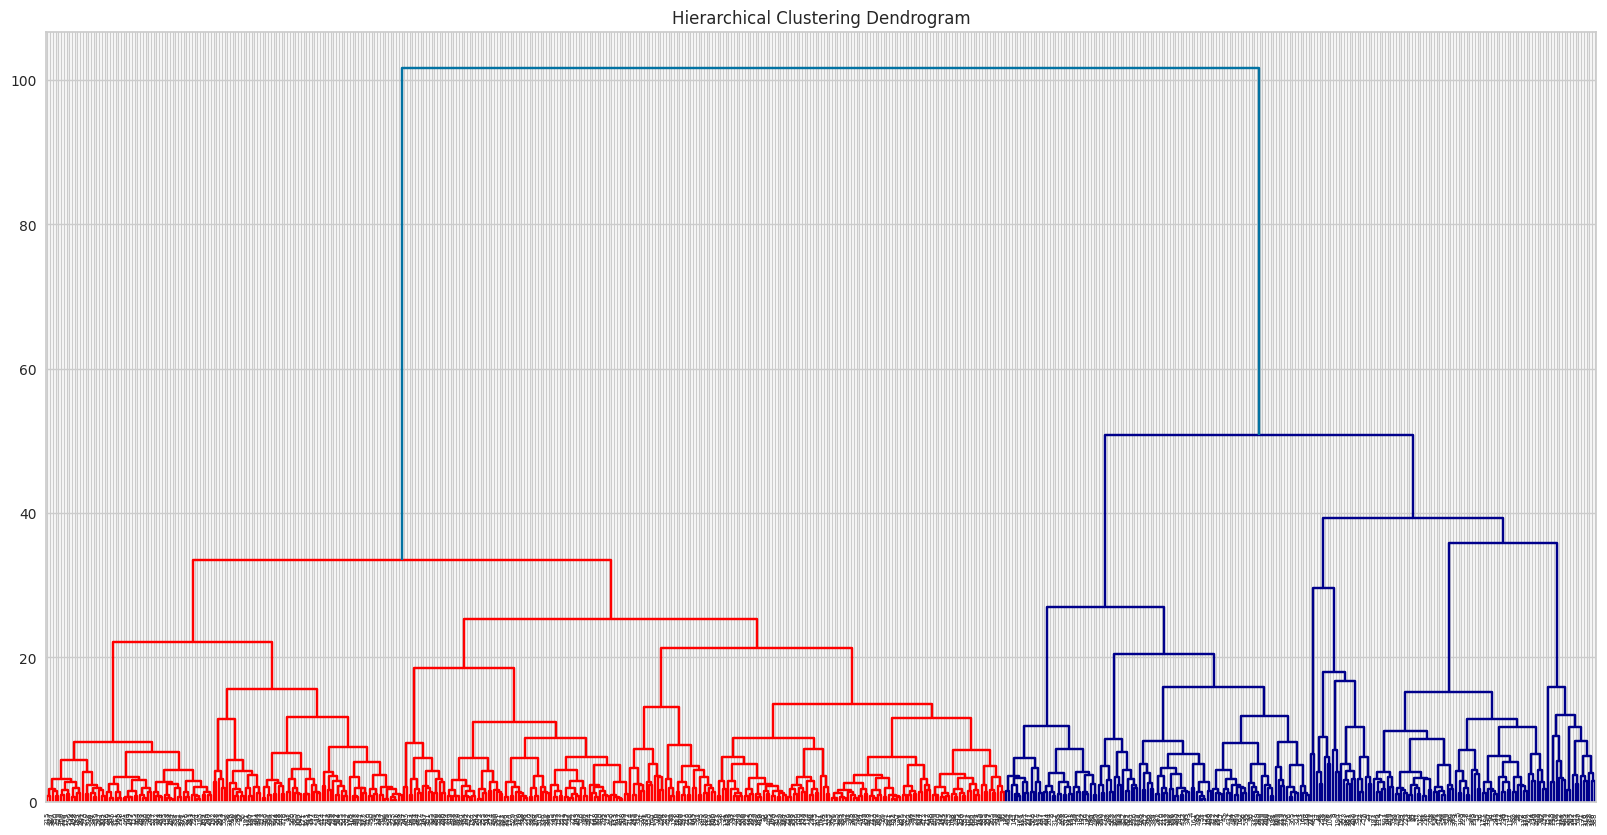

In [37]:
# finding number of clusters using dendrogram.
plt.figure(figsize=(20, 10))
dendrogram(linkage(pca_output_data, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

`The cluster size here again is 2 and hence we will now apply HAC on the reduced dataset.`

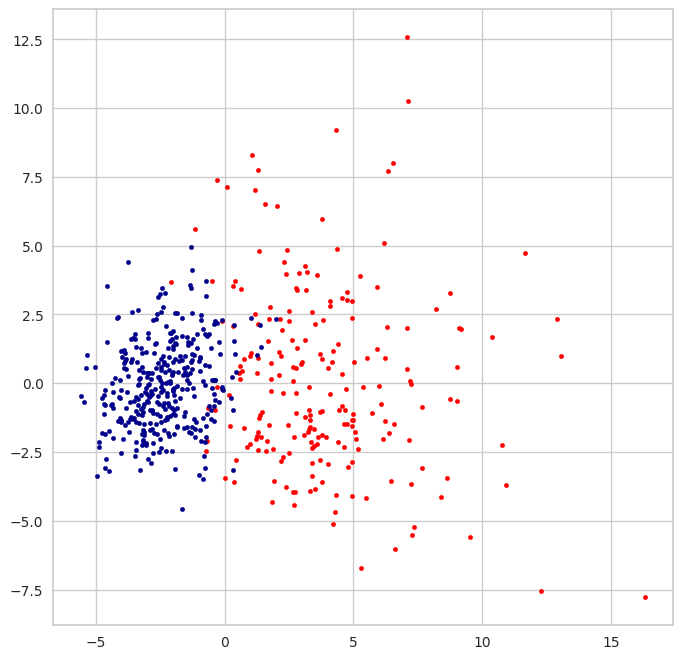

In [38]:
agg_pca = cluster.AgglomerativeClustering(
        n_clusters=2, 
        metric='euclidean', 
        linkage='ward', 
        compute_distances=True
    )
hac_labels_pca = agg_pca.fit_predict(pca_output_data)
print_clustering(pca_output_data, hac_labels_pca)

<div class="alert alert-block alert-success">
<b><ul><li>After applying HAC on the PCA reduced dataset, our clustering has become more detailed compared to the previous HAC output.</li></ul></b>
</div>

***

# Task 7

`1. Cluster Analysis`

In [39]:
# adding clustering results of Kmeans to the original dataset.
df['kmeans_cluster'] = cluster_assignments_km_pca
cluster_means = df.drop(columns=['diagnosis', 'id']).groupby('kmeans_cluster').mean()
cluster_means

mean_radius  mean_texture  mean_perimeter   mean_area  \
kmeans_cluster                                                          
0                 17.556614     21.358836      116.407725  993.669841   
1                 12.421655     18.260500       79.814000  486.390263   

                mean_smoothness  mean_compactness  mean_concavity  \
kmeans_cluster                                                      
0                      0.104921          0.158199        0.179555   
1                      0.092102          0.077554        0.043661   

                mean_concave_points  mean_symmetry  mean_fractal_dimension  \
kmeans_cluster                                                               
0                          0.094069       0.197901                0.064577   
1                          0.026463       0.172836                0.061913   

                ...  worst_radius  worst_texture  worst_perimeter  \
kmeans_cluster  ...                                                 
0               ...     21.291746      28.786402       143.049048   
1               ...     13.771129      24.130816        89.461474   

                 worst_area  worst_smoothness  worst_compactness  \
kmeans_cluster                                                     
0               1451.233862          0.146245           0.403735   
1                596.759474          0.125467           0.179923   

                worst_concavity  worst_concave_points  worst_symmetry  \
kmeans_cluster                                                          
0                      0.489863              0.189883        0.327004   
1                      0.163924              0.077166        0.271709   

                worst_fractal_dimension  
kmeans_cluster                           
0                              0.095179  
1                              0.078359  

[2 rows x 30 columns]

In [40]:
percentage_diff = ((cluster_means.iloc[0] - cluster_means.iloc[1]) / cluster_means.iloc[1]) * 100
percentage_diff

mean_radius                 41.338762
mean_texture                16.967421
mean_perimeter              45.848754
mean_area                  104.294764
mean_smoothness             13.918347
mean_compactness           103.987327
mean_concavity             311.251439
mean_concave_points        255.468184
mean_symmetry               14.502012
mean_fractal_dimension       4.303192
radius_error               124.178471
texture_error                2.926949
perimeter_error            129.996919
area_error                 248.642236
smoothness_error             1.092364
compactness_error           96.520470
concavity_error            128.747007
concave_points_error        76.099073
symmetry_error               8.695421
fractal_dimension_error     50.565839
worst_radius                54.611478
worst_texture               19.293116
worst_perimeter             59.900169
worst_area                 143.185727
worst_smoothness            16.560849
worst_compactness          124.392611
worst_concav

<div class="alert alert-block alert-success">
<b><ul><li>For determining which of the clusters would be the one for Malignant and Benign, one would mostly look at the radius, perimeter and area fields. The cluster with the largest values would mostly be Malignant.</li>
<li>However the important thing to note here is that area(includes perimeter and radius) in Cluster Group '0' is only 100% greater than the ones in Cluster Group 1. But we see a much more larger increase in features like compactness, concavity and concave points with the mean_concave_points in group 0 being 300% greater than the ones in group 1. </li></ul></b>
</div>

`2. Summarizing the result.`

<div class="alert alert-block alert-success">
<b><ul><li>For this project, we took a dataset that already had a classification column for the values. We dropped that column and using the values we tried to determine if we end up with the same number of clusters or if we would find more.</li>
<li>Based on both Kmeans and HAC, we got the cluster size as 2, which is the same number of classifications for the dataset.</li>
</ul></b>
</div>

Accuracy: 91.04


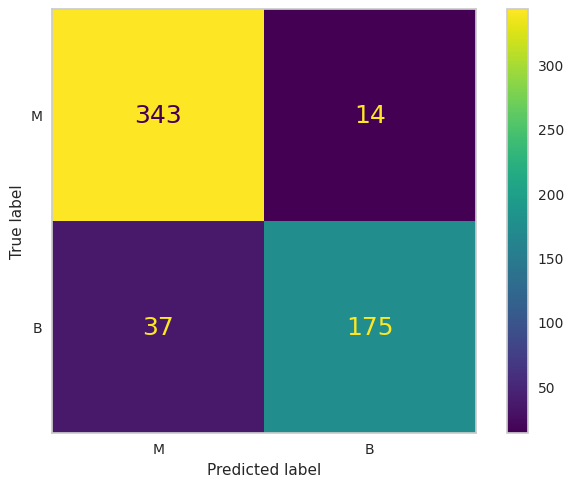

In [57]:
df['outcome_pca'] = np.where(cluster_assignments_km_pca == 0, 'M', 'B')
correct_predictions = (df['diagnosis'] == df['outcome_pca']).sum()
accuracy=round((correct_predictions / len(df)) * 100, 2)
print("Accuracy:", accuracy)
actual_classification = df['diagnosis']
pca_outcome = df['outcome_pca']
ConfusionMatrixDisplay.from_predictions(actual_classification, pca_outcome, display_labels = ['M', 'B'])
plt.grid(False)
plt.show()


Accuracy: 92.79


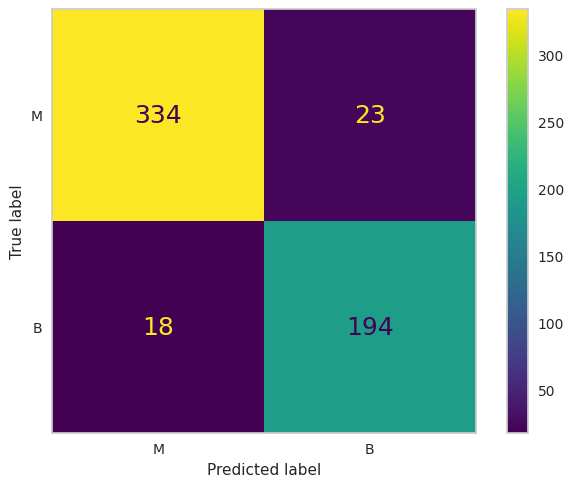

In [59]:
df['outcome_hac'] = np.where(hac_labels_pca == 0, 'M', 'B')
correct_predictions = (df['diagnosis'] == df['outcome_hac']).sum()
accuracy=round((correct_predictions / len(df)) * 100, 2)
print("Accuracy:", accuracy)
actual_classification = df['diagnosis']
pca_outcome = df['outcome_hac']
ConfusionMatrixDisplay.from_predictions(actual_classification, pca_outcome, display_labels = ['M', 'B'])
plt.grid(False)
plt.show()